# KNN classification on Iris dataset using scikit-learn

Import required libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Using scikit-learn 
1. Load the iris data set
2. Assinging petal length and petal width to X and class labels to y
3. Split the dataset into 30% test set and 70% training set

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris= load_iris()
X, y= iris.data[:, 2:], iris.target

X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.3,
                                                   random_state=123,
                                                   shuffle= True)

In [37]:
print(f'X_train_shape: {X_train.shape}')
print(f'y_train_shape: {y_train.shape}')
print(f'X_test_shape: {X_test.shape}')
print(f'y_test_shape: {y_test.shape}')

X_train_shape: (105, 2)
y_train_shape: (105,)
X_test_shape: (45, 2)
y_test_shape: (45,)


## Plot training dataset

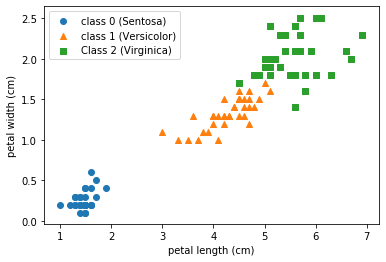

In [38]:
plt.scatter(X_train[y_train== 0, 0],
            X_train[y_train== 0, 1],
            marker= 'o',
            label= 'class 0 (Sentosa)')

plt.scatter(X_train[y_train== 1, 0],
            X_train[y_train== 1, 1],
            marker= '^',
            label= 'class 1 (Versicolor)')

plt.scatter(X_train[y_train== 2, 0],
            X_train[y_train== 2, 1],
            marker= 's',
            label= 'Class 2 (Virginica)')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc= 'upper left')

plt.show()

## Fit KNN model to the dataset
Use KneighborsClassifier class from scikit-learn to instantiate a KNN object called knn_model

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn_model= KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Predict using the knn model

In [40]:
y_pred= knn_model.predict(X_test)

In [41]:
num_correct_predictions= (y_pred == y_test).sum()
accuracy= (num_correct_predictions/ y_test.shape[0])* 100
print(f'Test set accuracy: %.2f %%' %accuracy)

Test set accuracy: 95.56 %


## Visualize decision boundaries

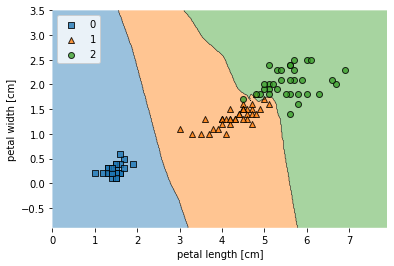

In [43]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc= 'upper left')
plt.show()

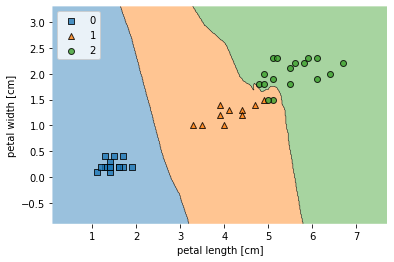

In [44]:
plot_decision_regions(X_test, y_test, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc= 'upper left')
plt.show()